# Кластеризация

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import seaborn as sns

# 1 Загрузите прилагающийся датасет.

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 2 Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.

In [ ]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 3 Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

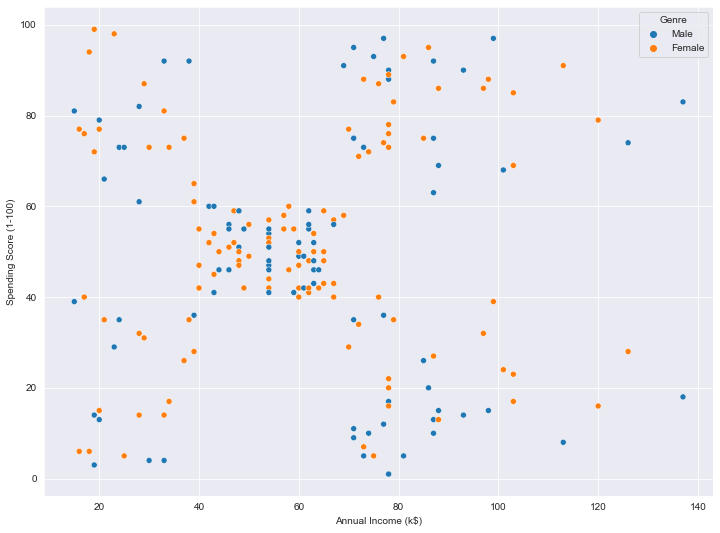

In [ ]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df , hue='Genre')

# 4 Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.

In [ ]:
X = pd.get_dummies(df, drop_first=True)

In [ ]:
X

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [ ]:
X.Genre_Male = X.Genre_Male.astype('int64')

# 5 Обучить модель К-средних и предсказать кластер для каждого значения из датасета.

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=90)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=90)

# 6 Построить графическую интерпретацию из пункта 3, с центрами кластеров.

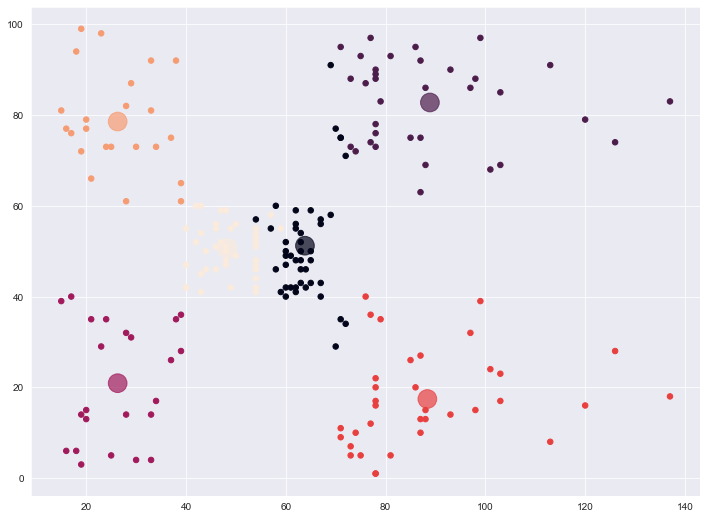

In [ ]:
fig = plt.figure(figsize=(12,9))
sns.set_style("darkgrid")


plt.scatter(X['Annual Income (k$)'],
            X['Spending Score (1-100)'],
            c=kmeans.labels_,
            s=30)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2],
            centers[:, 3],
            c=[0, 1, 2, 3, 4, 5],
            s=350,
            alpha=0.7);

# 7 Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.

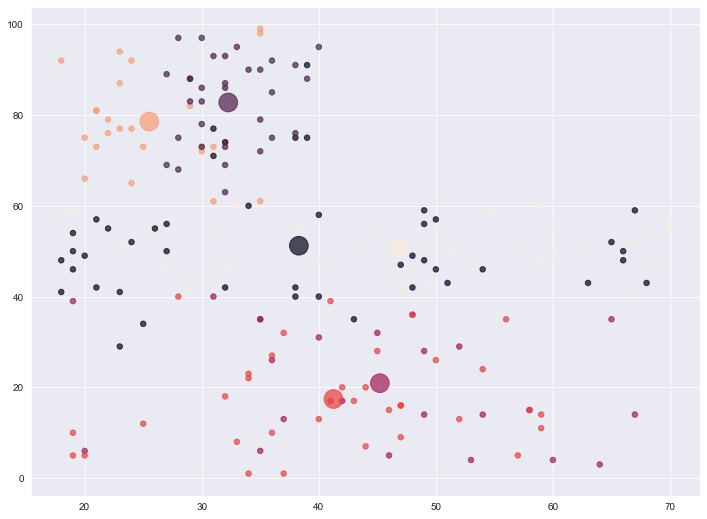

In [ ]:
fig = plt.figure(figsize=(12,9))
sns.set_style("darkgrid")

plt.scatter(X['Age'],
            X['Spending Score (1-100)'],
            c=kmeans.labels_,
            s=30,
            alpha=0.7)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1],
            centers[:, 3],
            c=[0, 1, 2, 3, 4, 5],
            s=350,
            alpha=0.7);

In [ ]:
kmeans.cluster_centers_

array([[109.61363636,  38.29545455,  63.84090909,  51.20454545,
          0.40909091],
       [166.82352941,  32.26470588,  88.88235294,  82.76470588,
          0.44117647],
       [ 23.        ,  45.2173913 ,  26.30434783,  20.91304348,
          0.39130435],
       [164.88571429,  41.25714286,  88.37142857,  17.42857143,
          0.54285714],
       [ 24.        ,  25.52173913,  26.30434783,  78.56521739,
          0.39130435],
       [ 67.14634146,  46.75609756,  48.24390244,  50.6097561 ,
          0.43902439]])

# 8 Оцените модель с помощью метрик.

In [ ]:
silhouette_score(X, kmeans.fit_predict(X))

0.4102937178956943

In [ ]:
calinski_harabasz_score(X, kmeans.fit_predict(X))

269.84985387663033

# 9 Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.

In [ ]:
results = dict()
for i in range(2, 11):
    k_means = KMeans(n_clusters=i, random_state=90)
    k_means.fit(X)
    results[i] = {'silhouette': silhouette_score(X, k_means.fit_predict(X)),
                  'calinski_harabasz': calinski_harabasz_score(X, k_means.fit_predict(X))}

<AxesSubplot:>

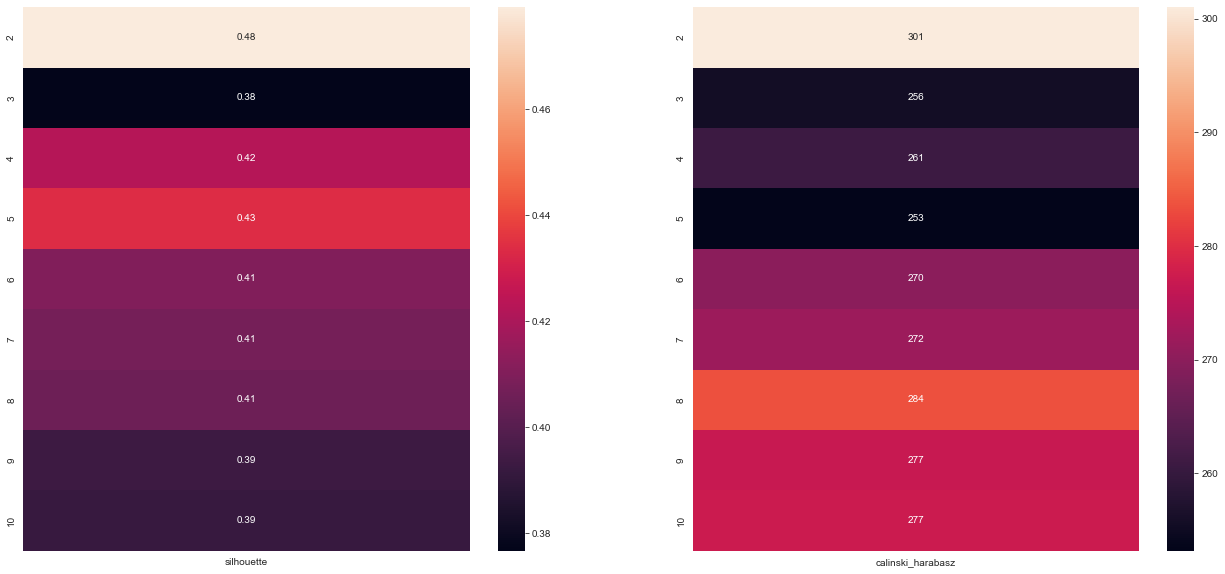

In [ ]:
fig, axes= plt.subplots(1, 2, figsize=(22,10))
sns.heatmap(pd.DataFrame.from_dict(results).T[['silhouette']], annot=True, ax=axes[0])
sns.heatmap(pd.DataFrame.from_dict(results).T[['calinski_harabasz']], annot=True, fmt='.3g', ax=axes[1])

Оценка силуэта измеряет расстояние между всеми точками данных в одном кластере. Чем меньше это расстояние, тем лучше оценка силуэта.

Оценку Калински и Харабаша. Отношение суммы межкластерной дисперсии и внутрикластерной дисперсии.